# Évolution des résultats de prédiction

## Version 0.0.1

- **Fichier principal** : main.py
- **Objectif** : L'objectif de ce code est de construire et entraîner un modèle de réseau neuronal à partir d'un ensemble de spécifications de logiciels pour effectuer une classification automatique de nouveaux textes de spécifications.
- **Description** : 
    - Ce code est un exemple d'utilisation de l'apprentissage en profondeur pour la classification automatique de textes. Il utilise le framework Keras pour construire et entraîner un réseau neuronal récurrent (LSTM) à partir d'un ensemble de données de spécifications de logiciels.
    - Le code commence par charger un fichier CSV de spécifications de logiciels dans un DataFrame pandas. Il divise ensuite l'ensemble de données en ensembles d'apprentissage et de test, convertit les étiquettes de classe en entiers et applique une tokenisation sur le texte des spécifications.
    - Ensuite, il définit l'architecture du réseau de neurones, qui consiste en une couche d'embedding, une couche de dropout spatial et une couche LSTM. Le modèle est compilé avec une fonction de perte de classification croisée catégorique et un optimiseur Adam.
    - Le modèle est ensuite entraîné sur les données d'apprentissage, avec une validation sur les données de test. Enfin, une fonction de prédiction est définie pour permettre de tester le modèle sur de nouveaux textes.
    - Le code se termine en appliquant la fonction de prédiction à une liste de phrases pour les classer selon les différentes catégories de spécifications de logiciels.

### Résultats obtenus

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

dfR0_0_1 = pd.read_csv('r0_0_1.csv')
dfR0_0_1

,loss,optimizer,metrics,epochs,batch_size,F,A,FT,L,LF,MN,O,PE,PO,SC,SE,US,TOTAL /24
0,categorical_crossentropy,adam,accuracy,150,600,1,1,0,1,1,0,0,1,0,0,2,0,7
1,categorical_crossentropy,adam,accuracy,250,600,2,1,0,1,2,0,0,0,0,1,1,0,8
2,categorical_crossentropy,adam,accuracy,350,600,2,0,0,0,2,0,0,1,0,0,2,0,7
3,binary_crossentropy,rmsprop,accuracy,150,600,2,0,0,0,0,0,0,0,0,0,0,0,2
4,categorical_crossentropy,sgd,binary_accuracy,250,600,2,0,0,0,0,0,0,0,0,0,0,0,2
5,categorical_crossentropy,adam,binary_accuracy,100,600,1,1,0,0,2,0,0,0,0,0,2,0,6
6,categorical_crossentropy,adam,binary_accuracy,150,600,1,1,0,1,2,0,0,1,0,1,2,1,10
7,categorical_crossentropy,adam,binary_accuracy,250,600,2,1,0,1,2,0,0,0,0,0,2,1,9


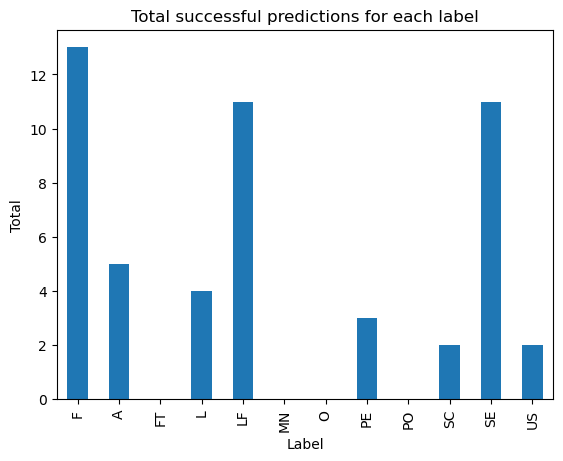

In [64]:
total_labels = dfR0_0_1.loc[:, 'F':'US'].sum()

fig, ax = plt.subplots()
total_labels.plot(kind='bar', ax=ax)

ax.set_title('Total successful predictions for each label')
ax.set_xlabel('Label')
ax.set_ylabel('Total')
plt.show()

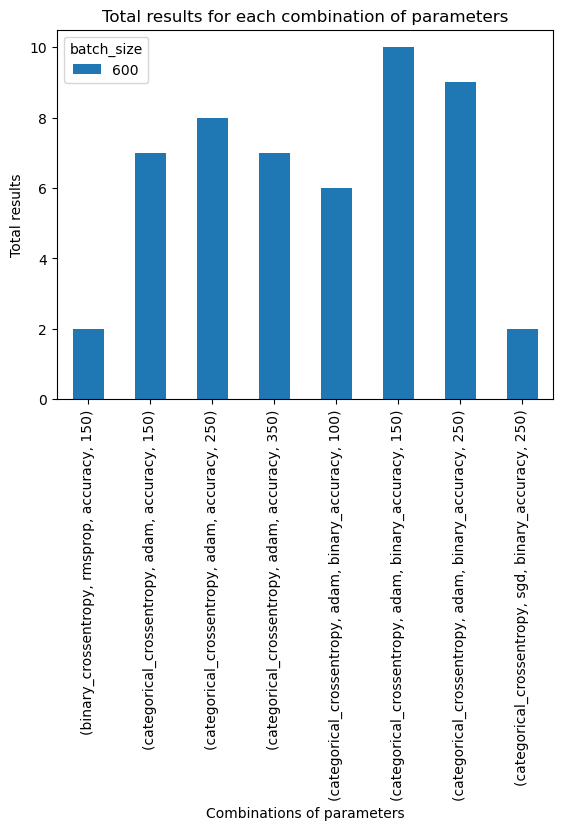

In [65]:
# Sélection des colonnes à utiliser pour le graphique
cols = ['loss', 'optimizer', 'metrics', 'epochs', 'batch_size']

# Création d'un sous-ensemble de données pour chaque label
losses = dfR0_0_1.groupby(cols)['TOTAL /24'].sum().unstack(fill_value=0)

# Création du graphique à barres empilées
losses.plot(kind='bar', stacked=True)

# Ajout des étiquettes des axes et du titre
plt.xlabel('Combinations of parameters')
plt.ylabel('Total results')
plt.title('Total results for each combination of parameters')

# Affichage du graphique
plt.show()

### Bilan

Dans le premier graphique, "**Total successful predictions for each label**", on peut voir la distribution totale des prédictions pour chaque label.
- On remarque que les labels "F", "LF" et "SE" ont le plus grand nombre de prédictions avec respectivement 13, 11 et 11 prédictions.
- Les labels "FT", "O", "MN" et "PO" n'ont pas de prédictions.
- Globalement, il y a une grande disparité dans le nombre de prédictions pour chaque label.

--

Dans le deuxième graphique, on peut observer la variation des scores de précision (accuracy) en fonction du nombre d'epochs pour chaque combinaison de loss, optimizer et metrics. Il s'agit du **nombre total de prédiction réussie pour une certaine configuration**.

- On peut remarquer que la performance varie en fonction de la combinaison choisie, avec certaines combinaisons qui atteignent un score d'accuracy élevé dès les premiers epochs (par exemple "binary_crossentropy" avec "rmsprop" et "accuracy"), tandis que d'autres combinaisons ont besoin de plus d'epochs pour atteindre un score d'accuracy plus élevé (par exemple "categorical_crossentropy" avec "sgd" et "binary_accuracy").
- De plus, on peut voir que la performance de certaines combinaisons atteint un plateau après un certain nombre d'epochs, ce qui suggère qu'augmenter le nombre d'epochs au-delà de ce seuil n'améliorerait pas la performance du modèle.
- Enfin, on peut noter que la combinaison "categorical_crossentropy" avec "adam" et "accuracy" semble avoir la meilleure performance globale, avec un score maximal atteint de 10 prédictions réussies sur les 24.

## Version 0.0.2

- **Fichier principal** : main.py
- **Objectif** : Améliorer et confirmer les résultats précédents avec ajustements par rapport aux exigences n'ayant reçues aucune prédiction.
- **Description** : 
    - Notre jeu de données est passé à un jeu de données composé de 535 exigences et spécifications logicielles contre 625 dans la version 0.0.1. Nous avons supprimé les exigences dont les tests montraient 0% de prédiction après l'entraînement contrairement aux autres.
    - Dans cette version, nous avons également supprimé les tests dont les paramètres étaient "binary_crossentropy", "rmsprop", "accuracy", "150" et "categorical_crossentropy", "sgd", "binary_accuracy", "250" car ils n'ont montré aucune prédiction pour les exigences en question même après l'entraînement, ce qui les rend inutiles pour l'analyse des performances du modèle.

### Résultats obtenus

In [66]:
dfR0_0_2 = pd.read_csv('r0_0_2.csv')
dfR0_0_2

,loss,optimizer,metrics,epochs,batch_size,F,A,L,LF,PE,SC,SE,US,TOTAL /24
0,categorical_crossentropy,adam,accuracy,150,535,1,1,1,2,0,0,2,1,8
1,categorical_crossentropy,adam,accuracy,250,535,2,1,1,1,0,1,1,1,8
2,categorical_crossentropy,adam,accuracy,350,535,1,1,1,0,1,1,2,0,7
3,categorical_crossentropy,adam,binary_accuracy,100,535,1,1,0,2,0,1,2,0,7
4,categorical_crossentropy,adam,binary_accuracy,150,535,1,1,1,2,1,1,1,0,8
5,categorical_crossentropy,adam,binary_accuracy,250,535,1,1,1,2,1,0,2,1,9


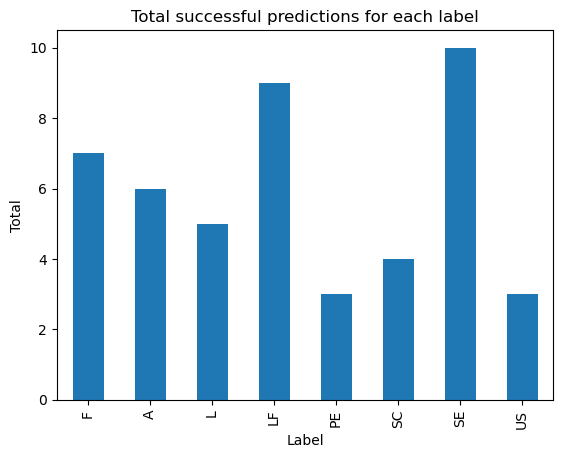

In [67]:
total_labels = dfR0_0_2.loc[:, 'F':'US'].sum()

fig, ax = plt.subplots()
total_labels.plot(kind='bar', ax=ax)

ax.set_title('Total successful predictions for each label')
ax.set_xlabel('Label')
ax.set_ylabel('Total')
plt.show()

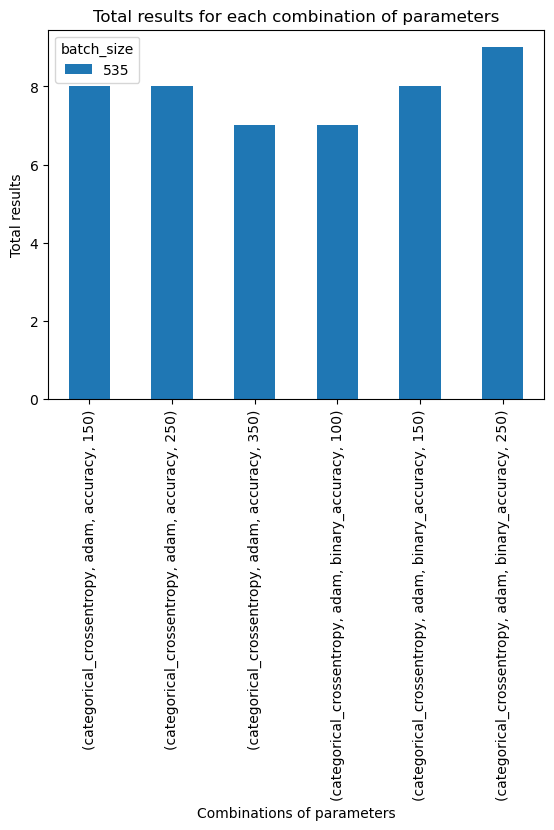

In [68]:
cols = ['loss', 'optimizer', 'metrics', 'epochs', 'batch_size']

losses = dfR0_0_2.groupby(cols)['TOTAL /24'].sum().unstack(fill_value=0)

losses.plot(kind='bar', stacked=True)

plt.xlabel('Combinations of parameters')
plt.ylabel('Total results')
plt.title('Total results for each combination of parameters')

plt.show()

### Bilan

Les deux graphiques réalisés sont les mêmes et axés de la même manière afin de faire une analyse de fond avec la version précédente.

- On remarque que les labels "LF" et "SE" ont le plus grand nombre de prédictions avec respectivement 9 et 10 prédictions (sur 12).
- Tous les labels ont au minimum été prédis 3 fois.
- Globalement, il y a toujours une grande disparité dans le nombre de prédictions pour chaque label.

--

Nous concentrerons les prochains tests sur la configuration suivante :
- categorical_crossentropy, adam, binary_accuracy

Avec une différence dans le nombre d'epochs utilisés.


## Version 0.1.0

- **Fichiers principaux** : main.py
- **Objectif** : Découvrir et tester une nouvelle manière d'input (envoyer la syntaxe de l'exigence à traiter plutôt que l'exigence en tant que telle.
- **Description** : 
    - La version 0.0.2 charge un fichier csv de spécifications logicielles, divise les données en ensembles de formation et de test, encode les étiquettes comme des entiers, tokenize le texte en utilisant Keras Tokenizer, et effectue un apprentissage supervisé sur un réseau de neurones à plusieurs couches.
    - La version 0.1.0 utilise la bibliothèque de traitement de texte process_text pour extraire la syntaxe des spécifications logicielles à partir du texte brut, stocke les résultats dans un fichier csv, charge les données, encode les étiquettes, tokenize la syntaxe à l'aide de Keras Tokenizer, et effectue l'apprentissage supervisé sur un réseau de neurones à plusieurs couches.

## Version 0.1.1

- **Fichiers principaux** : main_sentence.py
- **Objectif** : Améliorer la prédictions de toutes les exigences et prévoir l'affichage des métriques permettant de construire des graphiques, etc.
- **Description** : 
    - Le code commence par importer les bibliothèques nécessaires, comme pandas pour travailler avec les données sous forme de tableaux, sklearn pour la modélisation et l'évaluation, ainsi que Tensorflow et Keras pour créer et entraîner un modèle de réseaux de neurones.
    - Ensuite, le code lit les données du fichier csv et les divise en ensembles de formation et de test. Les étiquettes sont encodées sous forme numérique. Le texte est ensuite traité pour normaliser et nettoyer les données, et ensuite il est converti en une séquence d'entiers à l'aide d'un jeton.
    - Un modèle de réseau neuronal est créé et entraîné sur les données d'apprentissage, puis évalué sur les données de test en utilisant diverses mesures telles que la précision, le rappel, le score F1 et la matrice de confusion. Ces mesures sont affichées pour chaque étiquette, ainsi que pour l'ensemble du modèle.
    - Enfin, le code définit une fonction pour prédire la catégorie de nouvelle exigence, à partir d'une nouvelle description d'exigence fournie en entrée. Cette fonction est utilisée pour prédire la catégorie de chaque phrase de l'ensemble de phrases donné.

### Avant mise à jour de notre dataset

- Le modèle a été entrainé sur 250 epochs avec une loss de 0.0054, une précision binaire (binary_accuracy) de 0.9988 sur les données d'entrainement et une loss de validation de 2.0113, avec une précision binaire de validation de 0.9182.
- L'accuracy sur les données de test est de 0.66, ce qui n'est pas très élevé. Les performances de classification sont très hétérogènes selon les labels. On peut noter que certaines classes ont une précision et un rappel très faibles, telles que la classe A, avec une précision et un rappel de 0, ou la classe SC, avec une précision de 0.33 et un rappel de 0.17. D'autres classes ont de meilleurs résultats, comme la classe F, avec une précision de 0.80 et un rappel de 0.80, ou la classe SE, avec une précision de 0.69 et un rappel de 0.75.
- La moyenne pondérée de la précision et du rappel est de 0.66, ce qui correspond à l'accuracy. La moyenne pondérée de la précision, qui prend en compte la taille des classes, est également de 0.66. En revanche, la moyenne macro de la précision et du rappel est de 0.48 et 0.52 respectivement, ce qui montre que les performances du modèle ne sont pas équilibrées entre les différentes classes. Le score F1 moyen macro est de 0.49.
- Enfin, la matrice de confusion indique que le modèle a des difficultés à distinguer certaines classes, comme par exemple la classe A, F, LF et US, qui sont souvent confondues avec d'autres classes. Les autres classes sont relativement bien identifiées.

**Conclusion :** 
- Ajouter de nouvelles données :
    - Ajouter de nouvelles lignes à notre ensemble de données existant pour entraîner le modèle avec plus de données. Cela peut aider le modèle à généraliser mieux et à améliorer les performances.

In [69]:
dfRequirements = pnd.read_csv ('../v0.1.1/assets/csv/requirements.csv') 
dfRequirements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   535 non-null    object
 1   text    535 non-null    object
dtypes: object(2)
memory usage: 8.5+ KB


##### => Ces informations indiquent que le DataFrame a **535 entrées** (lignes) avec 2 colonnes: "label" et "text".

In [70]:
dfRequirementsBis = pnd.read_csv ('../v0.1.1/assets/csv/requirements_bis.csv') 
dfRequirementsBis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1188 non-null   object
 1   text    1188 non-null   object
dtypes: object(2)
memory usage: 18.7+ KB


##### => **1188 entrées** dans le DataFrame, avec les mêmes colonnes.

In [71]:
dfRequirements.columns = ['label', 'text']
dfRequirementsBis.columns = ['label', 'text']

print(dfRequirements['label'].value_counts())
print(dfRequirementsBis['label'].value_counts())

F     255
US     67
SE     66
PE     54
LF     38
A      21
SC     21
L      13
Name: label, dtype: int64
F     303
US    185
PE    165
SE    145
LF    137
A     107
SC    103
L      43
Name: label, dtype: int64


##### Les résultats montrent la répartition des données dans les deux dataframes dfRequirements et dfRequirementsBis.

=> La première impression est que la répartition des étiquettes dans dfRequirementsBis est plus uniforme que dans dfRequirements, où il y a moins d'exemples pour certaines étiquettes comme "L", "A" et "SC". Cela peut affecter la capacité du modèle à bien généraliser pour ces étiquettes moins représentées.

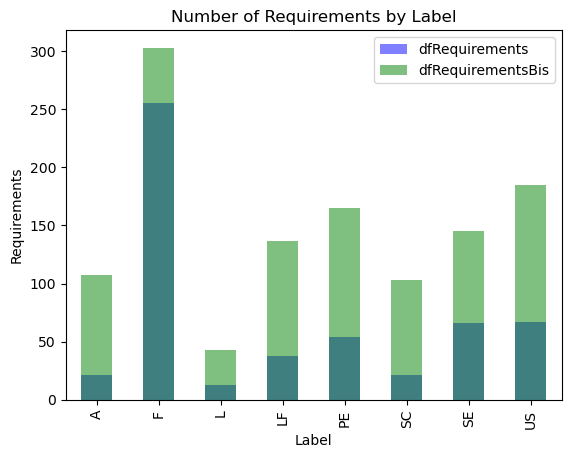

In [72]:
%matplotlib inline

ax = dfRequirements.groupby(by='label').size().plot(kind='bar', alpha=0.5, color='b')
dfRequirementsBis.groupby(by='label').size().plot(kind='bar', alpha=0.5, color='g')

plt.title('Number of Requirements by Label')
plt.xlabel('Label')
plt.ylabel('Requirements')

plt.legend(['dfRequirements', 'dfRequirementsBis'])

plt.show()

### Après mise à jour de notre dataset

In [73]:
dfR0_1_1 = pd.read_csv('r0_1_1.csv')
dfR0_1_1

,loss,optimizer,metrics,epochs,batch_size,test_size,F,A,L,LF,PE,SC,SE,US,TOTAL /16
categorical_crossentropy,adam,binary_accuracy,275,1188,0,2,2,2,2,2,2,2,2,1,15


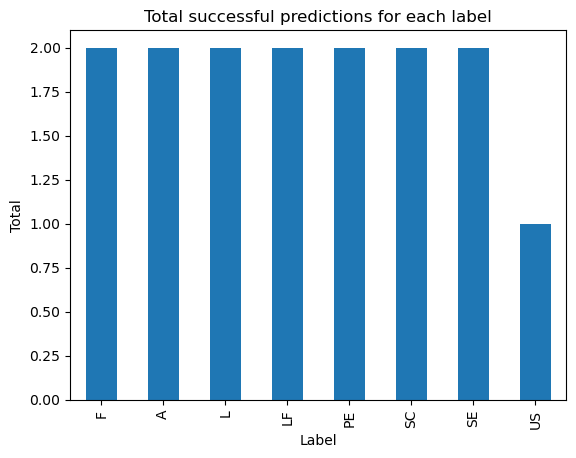

In [74]:
total_labels = dfR0_1_1.loc[:, 'F':'US'].sum()

fig, ax = plt.subplots()
total_labels.plot(kind='bar', ax=ax)

ax.set_title('Total successful predictions for each label')
ax.set_xlabel('Label')
ax.set_ylabel('Total')
plt.show()

##### => Accuracy: 0.84

En comparant les résultats, on peut voir que le deuxième code donne une meilleure performance en termes de précision, rappel et score F1 pour toutes les étiquettes. L'accuracy est également plus élevée, passant de 0,66 à 0,84.

# Présentation de l'algorithme actuel

## Preface

Le code utilise une approche de classification de texte à l'aide de réseaux de neurones, plus précisément un réseau de neurones récurrents LSTM (Long Short-Term Memory) pour prédire la catégorie d'exigence d'un texte donné.

## Étapes clés de l'algorithme

1. Chargement des bibliothèques et des données : les bibliothèques utilisées sont importées, notamment pandas pour lire le fichier de données, numpy pour les opérations numériques, sklearn pour les fonctionnalités de prétraitement et de modélisation des données, et keras pour la modélisation des réseaux de neurones. Les exigences de données sont stockées dans un fichier CSV, qui est chargé dans un objet DataFrame.
2. Prétraitement des données : les données sont divisées en ensembles de formation et de test, les étiquettes sont encodées en tant qu'entiers, le texte est tokenizé (séparé en mots) et transformé en séquences numériques, puis ces séquences sont uniformisées à une longueur maximale, et enfin les étiquettes sont transformées en tableaux one-hot (encodage de catégorie) pour être utilisées dans le modèle.
3. Modélisation des données : un modèle de réseau de neurones récurrents LSTM est construit, avec une couche d'embedding en entrée, une couche SpatialDropout1D pour la régularisation, une couche LSTM, et une couche Dense pour la classification. Le modèle est compilé avec une fonction de perte et une méthode d'optimisation appropriées.
4. Formation du modèle : le modèle est entraîné sur les données d'entraînement, avec un nombre d'époques et une taille de lot (batch size) prédéfinis. Les données de validation sont également utilisées pour mesurer les performances du modèle.
5. Prédiction et évaluation du modèle : le modèle est utilisé pour prédire les étiquettes des données de test, et les résultats sont comparés avec les étiquettes réelles pour calculer diverses métriques d'évaluation, telles que la précision, le rappel et le score F1. La matrice de confusion est également calculée et imprimée. Enfin, la fonction de prédiction est définie pour être utilisée avec des textes personnalisés.

## Résumé

En résumé, mon algorithme utilise un modèle de réseau de neurones récurrents LSTM pour classer les exigences de texte. Les données sont prétraitées, le modèle est construit et entraîné, puis évalué sur les données de test.